# Illustration of gpr model 
This is a jupyter notebook on how to use the developing code to establish gaussian process model 

In [1]:
import sys
import torch
import gpytorch
import numpy as np
import matplotlib.pyplot as plt
folder_path = "/home/yaga/Documents/GitHub/mfpml"
sys.path.insert(0, folder_path)

# import local functions
from mfpml.design_of_experiment.sf_samplers import LatinHyperCube
from mfpml.problems.sf_functions import Forrester
from mfpml.design_of_experiment.plot_figures import plot_sf_sampling
from mfpml.models.gaussian_processes import Kriging

In [22]:
# user-defined parameters
num_sample = 5
# define the design space
function = Forrester()
design_space = function.design_space
# sampling
sampler = LatinHyperCube(design_space=design_space, seed=None)
sample_x = sampler.get_samples(num_samples=num_sample)
sample_y = function.f(sample_x)
train_x = torch.from_numpy(sample_x)
train_y = torch.from_numpy(sample_y).flatten()

In [23]:
# gpr model
gprmodel = Kriging()
gprmodel.train(
    train_x=train_x.clone(), 
    train_y=train_y.clone(), 
    design_space=design_space,
    training_iteration=1000, 
    learning_rate=0.02,  
    normlize=False,
    print_info=True
)
# prediction 
num_test = 1000
# test_x = np.linspace(0, 1, num_test)
test_x_temp = np.linspace(0, 1, num_test)
test_y__temp = function.f(test_x_temp)
test_x = torch.from_numpy(test_x_temp)
test_y = torch.from_numpy(test_y__temp).flatten()
pred = gprmodel.predict(test_x=test_x)

/home/yaga/miniconda3/envs/MLenv3/lib/python3.10/site-packages/gpytorch/likelihoods/noise_models.py:144: NumericalWarning: Very small noise values detected. This will likely lead to numerical instabilities. Rounding small noise values up to 0.0001.
  warnings.warn(


Iter 1/1000 - Loss: 1039.564   lengthscale: 0.693 
Iter 2/1000 - Loss: 1027.801   lengthscale: 0.683 
Iter 3/1000 - Loss: 1016.234   lengthscale: 0.673 
Iter 4/1000 - Loss: 1004.820   lengthscale: 0.664 
Iter 5/1000 - Loss: 993.512   lengthscale: 0.654 
Iter 6/1000 - Loss: 982.255   lengthscale: 0.644 
Iter 7/1000 - Loss: 970.990   lengthscale: 0.635 
Iter 8/1000 - Loss: 959.651   lengthscale: 0.626 
Iter 9/1000 - Loss: 948.164   lengthscale: 0.616 
Iter 10/1000 - Loss: 936.449   lengthscale: 0.607 
Iter 11/1000 - Loss: 924.421   lengthscale: 0.598 
Iter 12/1000 - Loss: 911.981   lengthscale: 0.589 
Iter 13/1000 - Loss: 899.026   lengthscale: 0.580 
Iter 14/1000 - Loss: 885.439   lengthscale: 0.571 
Iter 15/1000 - Loss: 871.096   lengthscale: 0.562 
Iter 16/1000 - Loss: 855.860   lengthscale: 0.554 
Iter 17/1000 - Loss: 839.584   lengthscale: 0.545 
Iter 18/1000 - Loss: 822.112   lengthscale: 0.536 
Iter 19/1000 - Loss: 803.281   lengthscale: 0.527 
Iter 20/1000 - Loss: 782.923   lengt

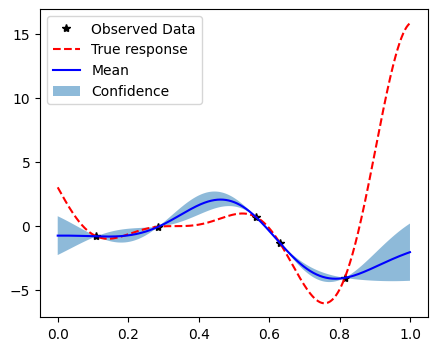

In [24]:
# get mean 
pred_mean = pred.mean.numpy()
lower, upper = pred.confidence_region()
# plot the fitting
with torch.no_grad():
    f, ax = plt.subplots(1, 1, figsize=(5, 4))
    ax.plot(train_x.numpy(), train_y.numpy(), "k*")
    ax.plot(test_x.numpy(), test_y, "r--")
    ax.plot(test_x.numpy(), pred_mean, "b")
    ax.fill_between(test_x, lower.numpy(), upper.numpy(), alpha=0.5)
    ax.legend(["Observed Data", "True response", "Mean", "Confidence"])
    plt.show()

## standard gaussian processes model 
this model can hanld the noise properly

In [27]:
# import needed packages and functions 
import math
from mfpml.models.gaussian_processes import GPR

In [28]:
# Training data is 100 points in [0,1] inclusive regularly spaced
train_x = torch.linspace(0, 1, 100)
# True function is sin(2*pi*x) with Gaussian noise
train_y = torch.sin(train_x * (2 * math.pi)) + torch.randn(
    train_x.size()
) * math.sqrt(0.04)
# gpr model
gprmodel = GPR()

gprmodel.train(
    train_x=train_x, train_y=train_y, training_iteration=200, print_info=True
)

Iter 1/200 - Loss: 0.960   lengthscale: 0.693 
Iter 2/200 - Loss: 0.929   lengthscale: 0.644 
Iter 3/200 - Loss: 0.895   lengthscale: 0.598 
Iter 4/200 - Loss: 0.858   lengthscale: 0.555 
Iter 5/200 - Loss: 0.814   lengthscale: 0.514 
Iter 6/200 - Loss: 0.765   lengthscale: 0.476 
Iter 7/200 - Loss: 0.712   lengthscale: 0.439 
Iter 8/200 - Loss: 0.657   lengthscale: 0.405 
Iter 9/200 - Loss: 0.605   lengthscale: 0.372 
Iter 10/200 - Loss: 0.558   lengthscale: 0.342 
Iter 11/200 - Loss: 0.516   lengthscale: 0.315 
Iter 12/200 - Loss: 0.478   lengthscale: 0.292 
Iter 13/200 - Loss: 0.443   lengthscale: 0.271 
Iter 14/200 - Loss: 0.409   lengthscale: 0.255 
Iter 15/200 - Loss: 0.376   lengthscale: 0.241 
Iter 16/200 - Loss: 0.344   lengthscale: 0.230 
Iter 17/200 - Loss: 0.312   lengthscale: 0.221 
Iter 18/200 - Loss: 0.281   lengthscale: 0.215 
Iter 19/200 - Loss: 0.251   lengthscale: 0.210 
Iter 20/200 - Loss: 0.221   lengthscale: 0.207 
Iter 21/200 - Loss: 0.192   lengthscale: 0.206 
I

In [29]:
# prediction
# define the test points
num_test = 1000
# test_x = np.linspace(0, 1, num_test)
test_x = torch.linspace(0, 1, 1000)
# True function is sin(2*pi*x) with Gaussian noise
test_y = torch.sin(test_x * (2 * math.pi)) + torch.randn(
    test_x.size()
) * math.sqrt(0.04)
pred = gprmodel.predict(test_x=test_x)

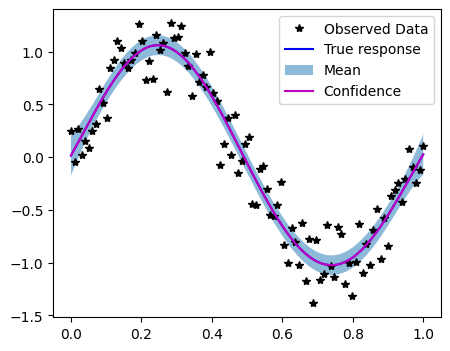

In [31]:
# get mean
pred_mean = pred.mean.numpy()
lower, upper = pred.confidence_region()
# plot the fitting
with torch.no_grad():
    f, ax = plt.subplots(1, 1, figsize=(5, 4))
    ax.plot(train_x.numpy(), train_y.numpy(), "k*")
    # ax.plot(test_x.numpy(), test_y.numpy(), "ro")
    ax.plot(test_x.numpy(), pred_mean, "b")
    ax.fill_between(test_x, lower.numpy(), upper.numpy(), alpha=0.5)
    ax.plot(test_x.numpy(), pred_mean, "m")
    ax.legend(["Observed Data", "True response", "Mean", "Confidence"])
    plt.show()